IMPORTS

In [1]:
# Import necessary libraries
from google.colab import drive
drive.mount("/drive", force_remount=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy.sparse import hstack, csr_matrix, vstack
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Mounted at /drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# DATA-SET LOAD:

In [2]:
def loadDataset(filename):
  return pd.read_csv(filename)

Loading Twitter Hate Speech Datasets:

In [3]:
df1 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Twitter hate speech/train_E6oV3lV.csv')
df2 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Twitter hate speech/labeled_data.csv')

Loading Cyberbullying Datasets:

In [4]:
df3 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/aggression_parsed_dataset.csv')
df4 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/kaggle_parsed_dataset.csv')
df5 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/attack_parsed_dataset.csv')
df6 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/twitter_racism_parsed_dataset.csv')
df7 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/toxicity_parsed_dataset.csv')
df8 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/youtube_parsed_dataset.csv')
df9 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/twitter_parsed_dataset.csv')
df10 = loadDataset('/drive/My Drive/Colab Notebooks/SMDM/Cyberbullying Dataset/twitter_sexism_parsed_dataset.csv')

Dataset1:

In [5]:
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df1.shape

(31962, 3)

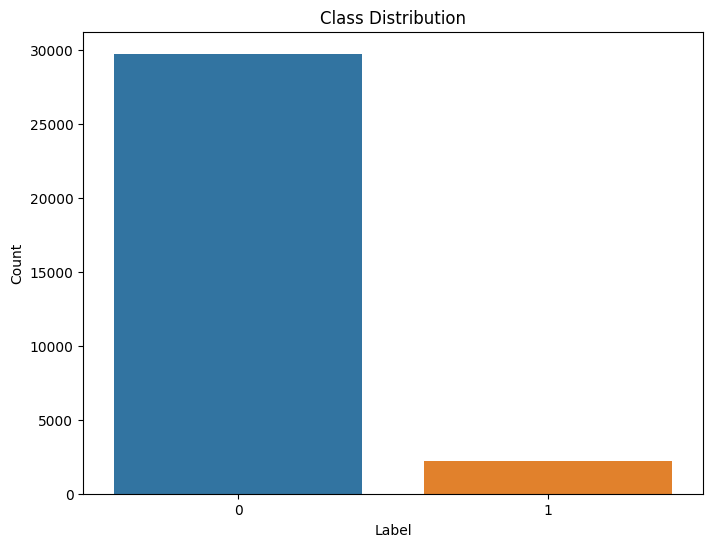

In [7]:
# Display class distribution of Dataset1
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df1)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [8]:
df1.rename(columns = {'tweet':'comment'},
           inplace = True)

In [9]:
df1.head()

,id,label,comment
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Dataset 2:



In [10]:
df2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df2.shape

(24783, 7)

In [12]:
df2['label'] = df2['class'].apply(lambda x: 0 if x == 2 else 1)

In [13]:
df2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [14]:
df2 = df2[['tweet', 'label']]

In [15]:
df2.head()

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [16]:
df2.shape

(24783, 2)

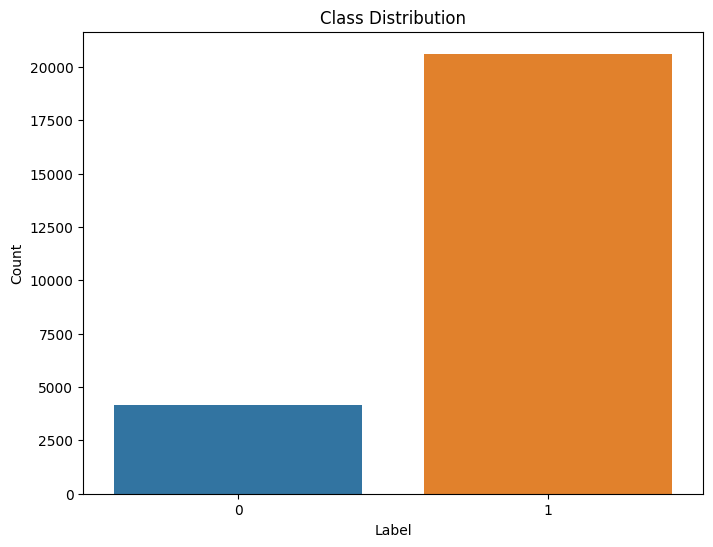

In [17]:
# Display class distribution of Dataset2
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df2)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [18]:
df2.rename(columns = {'tweet':'comment'},
           inplace = True)

In [19]:
df2.head()

,comment,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [20]:
df2.shape

(24783, 2)

Dataset3:

In [21]:
df3.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


In [22]:
df3.shape

(115864, 5)

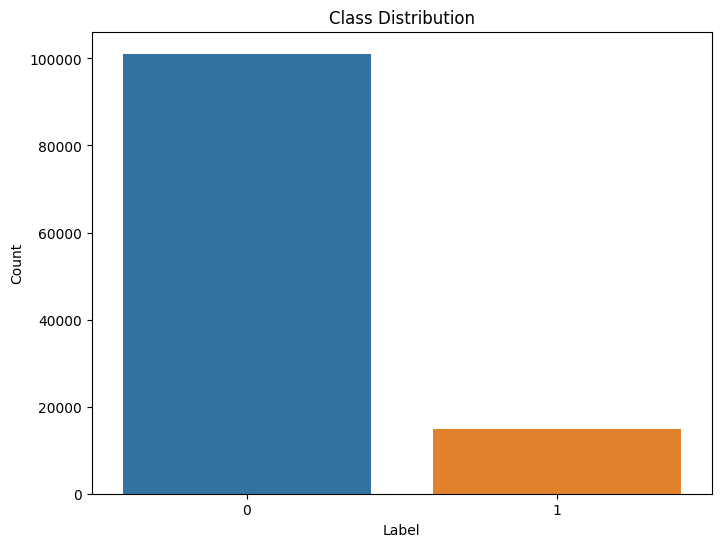

In [23]:
# Display class distribution of Dataset3
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df3)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [24]:
#As there is a lot of difference in data counts for each label,
#We are randomly removing some positive comments to balance the data.
if df3['oh_label'].eq(0).any():
    num_rows = len(df3)
    drop_percent = 0.7
    num_to_drop = int(drop_percent * num_rows)

    drop_indices = np.random.choice(df3[df3['oh_label'] == 0].index, size=num_to_drop, replace=False)

    df3_dropped = df3.drop(index=drop_indices)

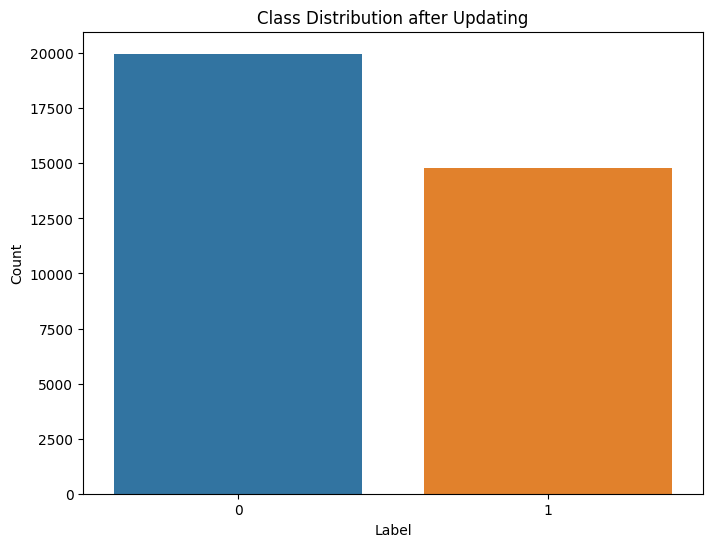

In [25]:
# Display class distribution of Dataset3
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df3_dropped)
plt.title('Class Distribution after Updating')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [26]:
df3_dropped.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [27]:
df3_dropped.head()

,index,comment,ed_label_0,ed_label_1,label
2,2,"True or false, the situation as of March 200...",1.0,0.0,0
7,7,`:If you ever claimed in a Judaic studies prog...,0.8,0.2,0
11,11,` Care should be taken to distinguish when an...,1.0,0.0,0
13,13,On my you will find the apology that I owe...,1.0,0.0,0
18,18,":No, I really haven't heard of either one,...",1.0,0.0,0


In [28]:
df3_dropped.shape

(34760, 5)

Dataset 4:

In [29]:
df4.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [30]:
df4.shape

(8799, 4)

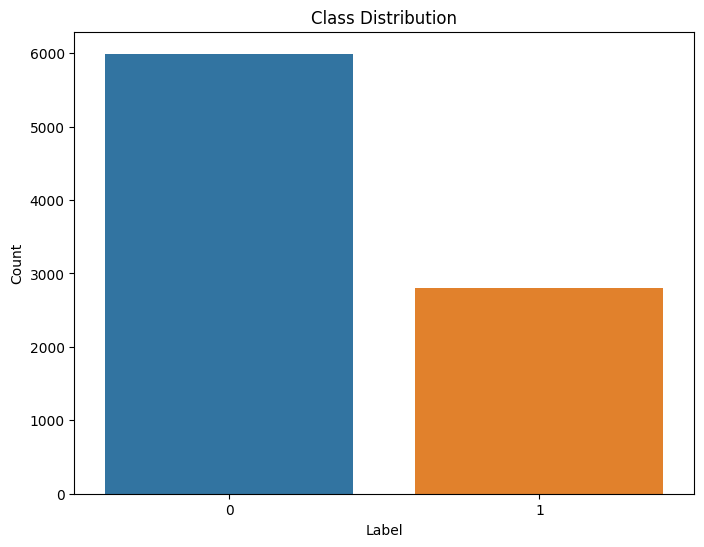

In [31]:
# Display class distribution of Dataset4
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df4)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [32]:
df4.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [33]:
df4.head()

,index,label,Date,comment
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [34]:
df4.shape

(8799, 4)

**Dataset** 5

In [35]:
df5.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,1.000000,0.000000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


In [36]:
df5.shape

(115864, 5)

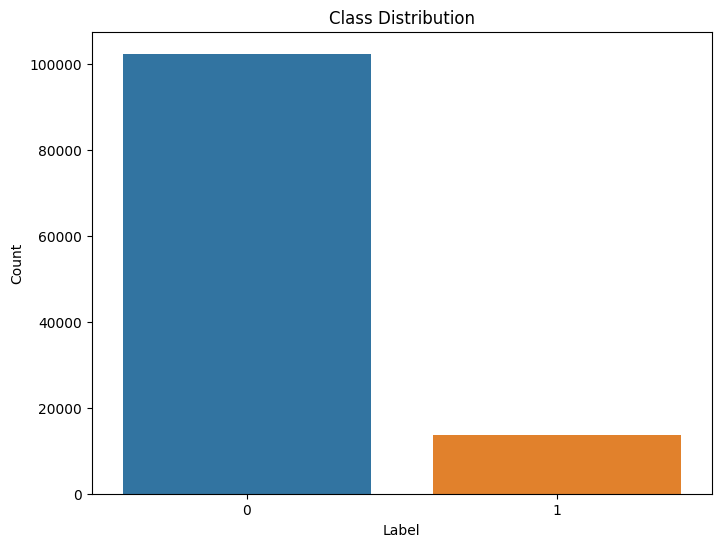

In [37]:
# Display class distribution of Dataset5
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df5)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [38]:
#As there is a lot of difference in data counts for each label,
#We are randomly removing some positive comments to balance the data.
if df5['oh_label'].eq(0).any():
    num_rows = len(df3)
    drop_percent = 0.7
    num_to_drop = int(drop_percent * num_rows)

    drop_indices = np.random.choice(df5[df5['oh_label'] == 0].index, size=num_to_drop, replace=False)

    df5_dropped = df5.drop(index=drop_indices)

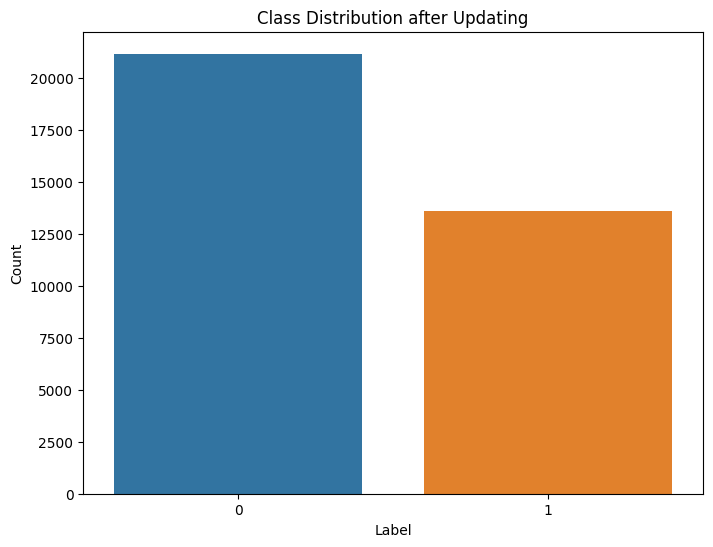

In [39]:
# Display class distribution of Dataset5
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df5_dropped)
plt.title('Class Distribution after Updating')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [40]:
df5_dropped.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [41]:
df5_dropped.head()

,index,comment,ed_label_0,ed_label_1,label
1,1,` :: the term ``standard model`` is itself le...,1.0,0.0,0
2,2,"True or false, the situation as of March 200...",1.0,0.0,0
6,6,I removed the following: All names of early P...,1.0,0.0,0
8,8,"My apologies I'm English, I watch cricket,...",1.0,0.0,0
9,9,"`Someone wrote: More recognizable, perhaps, is...",1.0,0.0,0


In [42]:
df5_dropped.shape

(34760, 5)

Dataset 6: -

In [43]:
df6.head()

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0


In [44]:
df6.shape

(13471, 5)

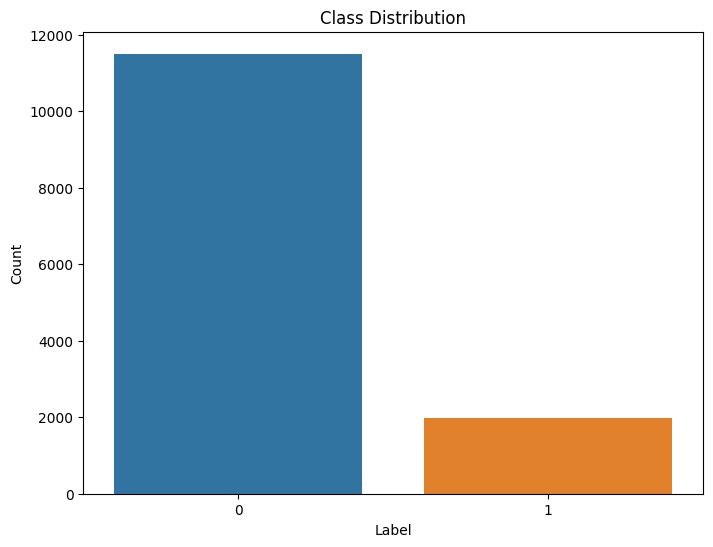

In [45]:
# Display class distribution of Dataset6
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df6)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [46]:
#As there is a lot of difference in data counts for each label,
#We are randomly removing some positive comments to balance the data.
if df6['oh_label'].eq(0).any():
    num_rows = len(df6)
    drop_percent = 0.6
    num_to_drop = int(drop_percent * num_rows)

    drop_indices = np.random.choice(df6[df6['oh_label'] == 0].index, size=num_to_drop, replace=False)

    df6_dropped = df6.drop(index=drop_indices)

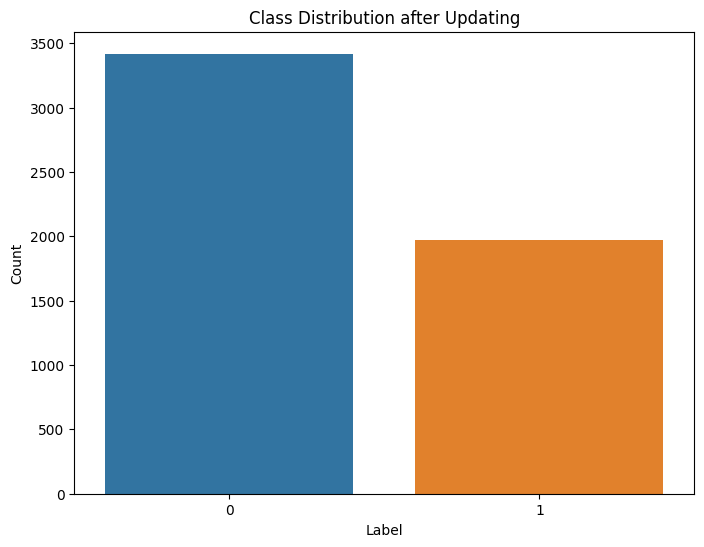

In [47]:
# Display class distribution of Dataset6
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df6_dropped)
plt.title('Class Distribution after Updating')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [48]:
df6_dropped.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [49]:
df6_dropped.head()

,index,id,comment,Annotation,label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
8,5.646041e+17,5.646041e+17,@HuffPostRelig Islam invaded and conquered 2/3...,racism,1
9,5.633700e+17,5.633700e+17,@semzyxx Do you approve of your pedophile prop...,racism,1


In [50]:
df6_dropped.shape

(5389, 5)

Dataset 7:

In [51]:
df7.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


In [52]:
df7.shape

(159686, 5)

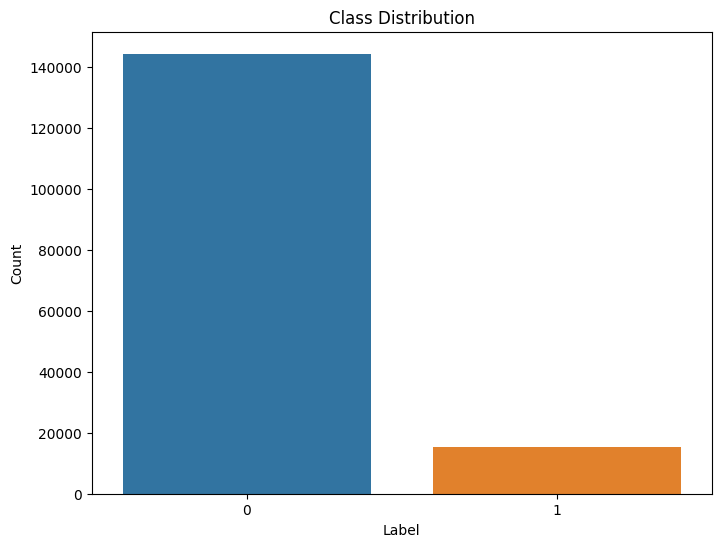

In [53]:
# Display class distribution of Dataset7
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df7)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [54]:
#As there is a lot of difference in data counts for each label,
#We are randomly removing some positive comments to balance the data.
if df6['oh_label'].eq(0).any():
    num_rows = len(df7)
    drop_percent = 0.7
    num_to_drop = int(drop_percent * num_rows)

    drop_indices = np.random.choice(df7[df7['oh_label'] == 0].index, size=num_to_drop, replace=False)

    df7_dropped = df7.drop(index=drop_indices)

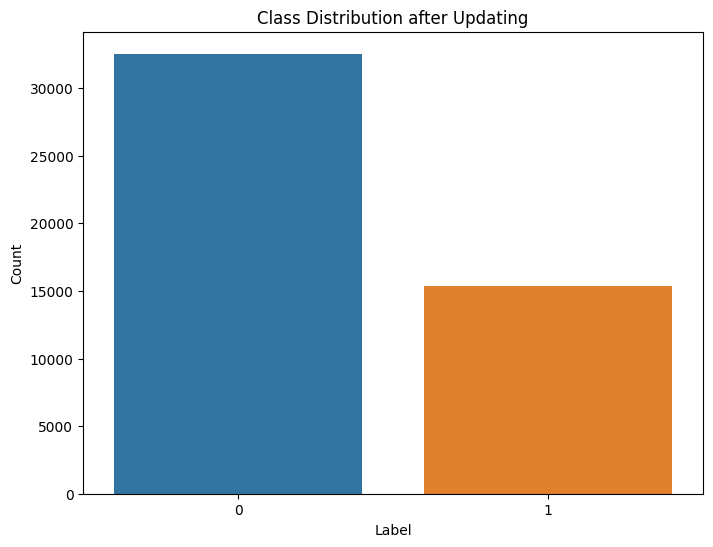

In [55]:
# Display class distribution of Dataset7
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df7_dropped)
plt.title('Class Distribution after Updating')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [56]:
df7_dropped.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [57]:
df7_dropped.head()

,index,comment,ed_label_0,ed_label_1,label
2,2,Elected or Electoral? JHK,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0
13,13,"Done. This entry is lond, I'll see about chopp...",0.9,0.1,0
16,16,7.11.02 1610 - Mav: This open source encyclo...,1.0,0.0,0
20,20,` ===Announcement=== I have compared Helga's ...,1.0,0.0,0


In [58]:
df7_dropped.shape

(47906, 5)

Dataset 8: -

In [59]:
df8.head()

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [60]:
df8.shape

(3464, 10)

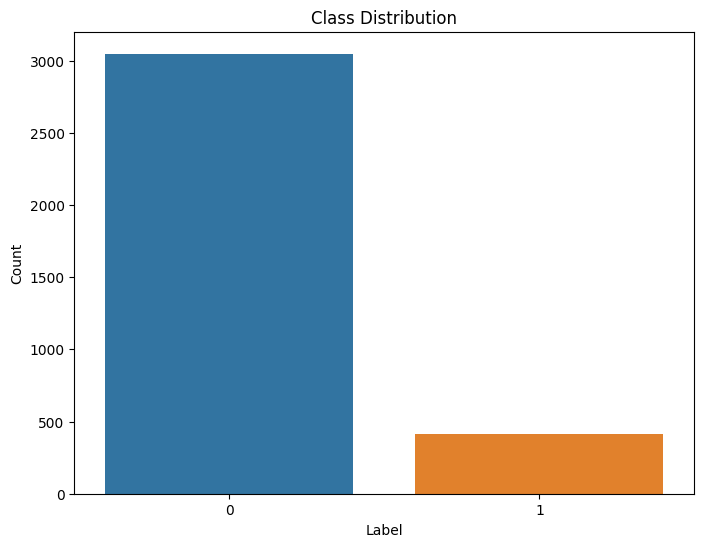

In [61]:
# Display class distribution of Dataset8
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df8)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [62]:
df8.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [63]:
df8.head()

,index,UserIndex,comment,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


Dataset 9: -

In [64]:
df9.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [65]:
df9.shape

(16851, 5)

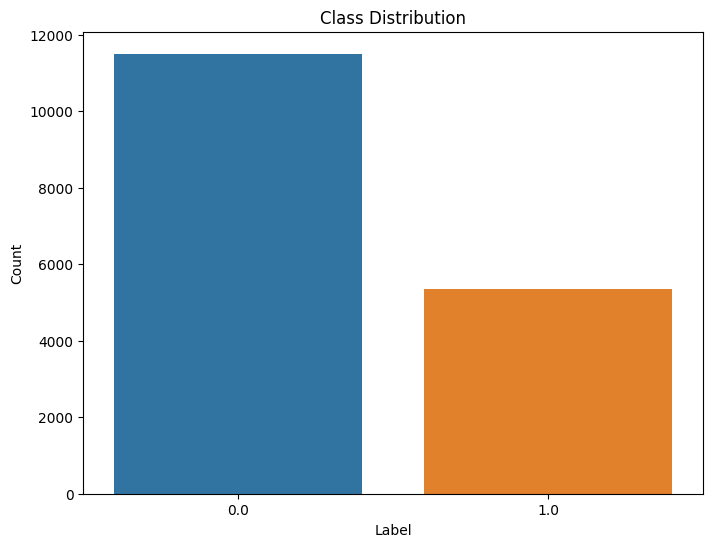

In [66]:
# Display class distribution of Dataset9
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df9)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [67]:
df9.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [68]:
df9.head()

,index,id,comment,Annotation,label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


Dataset 10 :  -

In [69]:
df10.head()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0


In [70]:
df10.shape

(14881, 5)

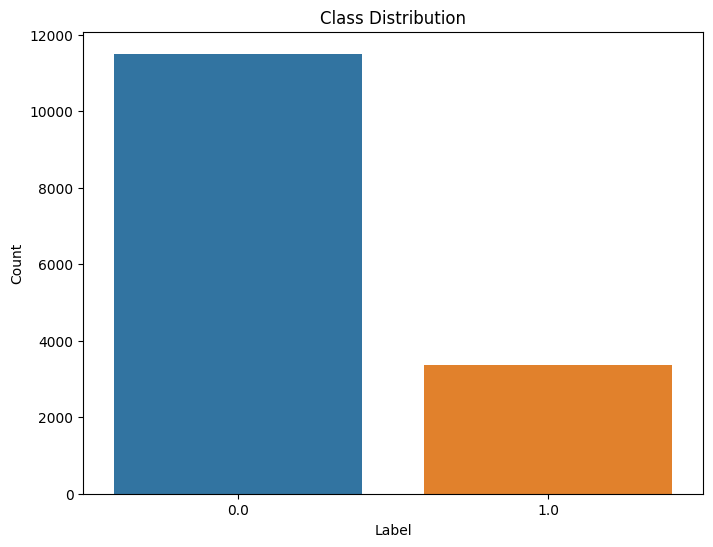

In [71]:
# Display class distribution of Dataset10
plt.figure(figsize=(8, 6))
sns.countplot(x='oh_label', data=df10)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [72]:
df10.rename(columns = {'oh_label':'label','Text':'comment'},
           inplace = True)

In [73]:
df10.head()

,index,id,comment,Annotation,label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0


In [74]:
df10.shape

(14881, 5)

## MERGE DATASETS

In [75]:
merged_df = pd.DataFrame() # Initialize an Empty Dataframe.
df_list = [df1[['comment', 'label']], df2[['comment', 'label']], df3_dropped[['comment', 'label']], df4[['comment', 'label']],
           df5_dropped[['comment', 'label']], df6_dropped[['comment', 'label']], df7_dropped[['comment', 'label']],
           df8[['comment', 'label']], df9[['comment', 'label']], df10[['comment', 'label']]]
merged_df = pd.concat(df_list, ignore_index=True)

In [76]:
merged_df

,comment,label
0,@user when a father is dysfunctional and is s...,0.0
1,@user @user thanks for #lyft credit i can't us...,0.0
2,bihday your majesty,0.0
3,#model i love u take with u all the time in ...,0.0
4,factsguide: society now #motivation,0.0
...,...,...
223550,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,0.0
223551,It is unconscionable that our regulatory bodie...,0.0
223552,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,0.0
223553,#mkr Unbelievable how low Kat &amp; Andre wil...,0.0


In [77]:
merged_df[merged_df.label == 1]

,comment,label
13,@user #cnn calls #michigan middle school 'buil...,1.0
14,no comment! in #australia #opkillingbay #se...,1.0
17,retweet if you agree!,1.0
23,@user @user lumpy says i am a . prove it lumpy.,1.0
34,it's unbelievable that in the 21st century we'...,1.0
...,...,...
223536,RT @lukeyook: If they think that dessert is re...,1.0
223543,Girls claiming they're hot generally have an o...,1.0
223545,"RT @ur_so_vanilla: Nikki &amp; Katie, didn't y...",1.0
223546,DID U WRITE THAT URSELF OMG @joeldanger All gi...,1.0


In [78]:
merged_df[merged_df.label == 0]

,comment,label
0,@user when a father is dysfunctional and is s...,0.0
1,@user @user thanks for #lyft credit i can't us...,0.0
2,bihday your majesty,0.0
3,#model i love u take with u all the time in ...,0.0
4,factsguide: society now #motivation,0.0
...,...,...
223550,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...,0.0
223551,It is unconscionable that our regulatory bodie...,0.0
223552,@Dartanveerahmad @Janx53 @geehall1 We want ISI...,0.0
223553,#mkr Unbelievable how low Kat &amp; Andre wil...,0.0


In [79]:
merged_df.to_csv('merged_data_final.csv', index=False)

#DATA PREPROCESSING:

In [80]:
## 1. Removal of punctuation and capitalization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming
## 5. Lemmatization

text=merged_df.comment

stopwords = nltk.corpus.stopwords.words("english")
#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stopwords = nltk.corpus.stopwords.words("english")
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):

    # Convert to lowercase
    text_lower = text.str.lower()

    # Remove URLs
    text_no_url = text_lower.str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

    # Remove user mentions
    text_no_mention = text_no_url.str.replace(r'@[\w_]+', '', regex=True)

    # Remove special characters, numbers, and punctuation
    text_no_special = text_no_mention.str.replace(r'\d+|[^a-zA-Z\s]', '', regex=True)

    # Replace multiple white spaces with a single space
    text_cleaned = text_no_special.str.replace(r'\s+', ' ', regex=True).str.strip()

    # Tokenize the tweet
    tokenized_text = text_cleaned.apply(lambda x: x.split() if isinstance(x, str) else [])

    # Remove stop words
    tokenized_text = tokenized_text.apply(lambda x: [item for item in x if item not in stopwords])

    # Stemming
    def apply_stemming(tokens):
        try:
            return [stemmer.stem(item) for item in tokens]
        except (AttributeError, RecursionError):
            return []

    # Apply stemming to each list of tokens
    tokenized_text = tokenized_text.apply(lambda x: apply_stemming(x) if isinstance(x, list) else [])

    #lemmatization
    tokenized_text = tokenized_text.apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

    # Remove repeated words
    tokenized_text = tokenized_text.apply(lambda x: list(dict.fromkeys(x)))

    for i in range(len(tokenized_text)):
        tokenized_text[i] = ' '.join(tokenized_text[i])
        cleaned_tweet= tokenized_text

    return cleaned_tweet

processed_comments = preprocess(text)

merged_df['processed_comment'] = processed_comments
print(merged_df[["comment","processed_comment"]].head(10))

                                             comment  \
0   @user when a father is dysfunctional and is s...   
1  @user @user thanks for #lyft credit i can't us...   
2                                bihday your majesty   
3  #model   i love u take with u all the time in ...   
4             factsguide: society now    #motivation   
5  [2/2] huge fan fare and big talking before the...   
6   @user camping tomorrow @user @user @user @use...   
7  the next school year is the year for exams.ð...   
8  we won!!! love the land!!! #allin #cavs #champ...   
9   @user @user welcome here !  i'm   it's so #gr...   

                                   processed_comment  
0               father dysfunct selfish drag kid run  
1  thank lyft credit cant use caus dont offer whe...  
2                                     bihday majesti  
3                          model love u take time ur  
4                            factsguid societi motiv  
5  huge fan fare big talk leav chao pay disput ge... 

# EDA (Exploratory Data Analysis)

In [81]:
hate_text = ' '.join(merged_df['processed_comment'][merged_df.label == 1])
non_hate_text = ' '.join(merged_df['processed_comment'][merged_df.label == 0])
wordcloud_hate = WordCloud(width=500, height=200, random_state=44, max_font_size=100, background_color = 'black').generate(hate_text)
wordcloud_non_hate = WordCloud(width=500, height=200, random_state=43, max_font_size=100, background_color = 'white').generate(non_hate_text)

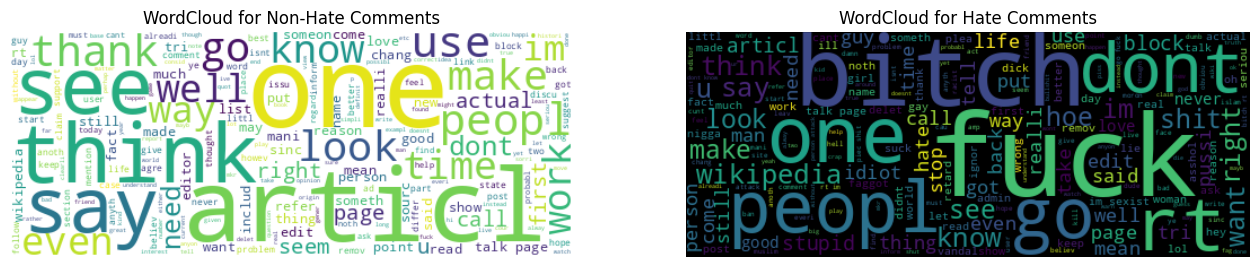

In [82]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
axs[0].imshow(wordcloud_non_hate, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('WordCloud for Non-Hate Comments')
axs[1].imshow(wordcloud_hate, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('WordCloud for Hate Comments')
plt.show()

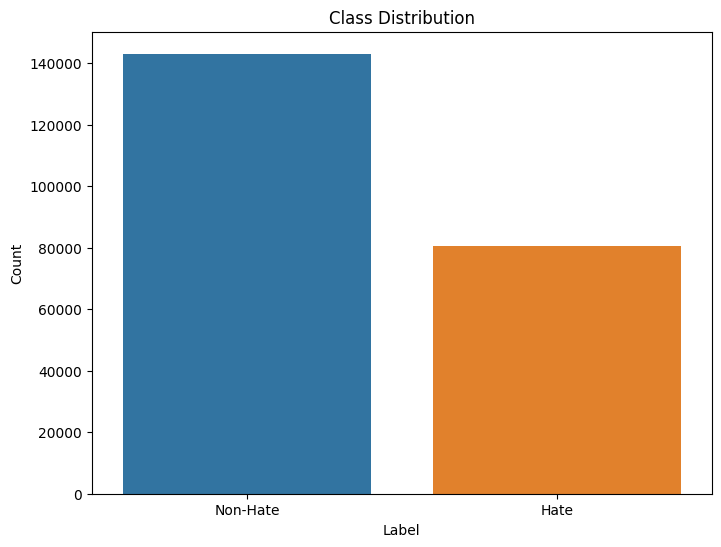

In [83]:
# Display class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=merged_df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Hate', 'Hate'])
plt.show()

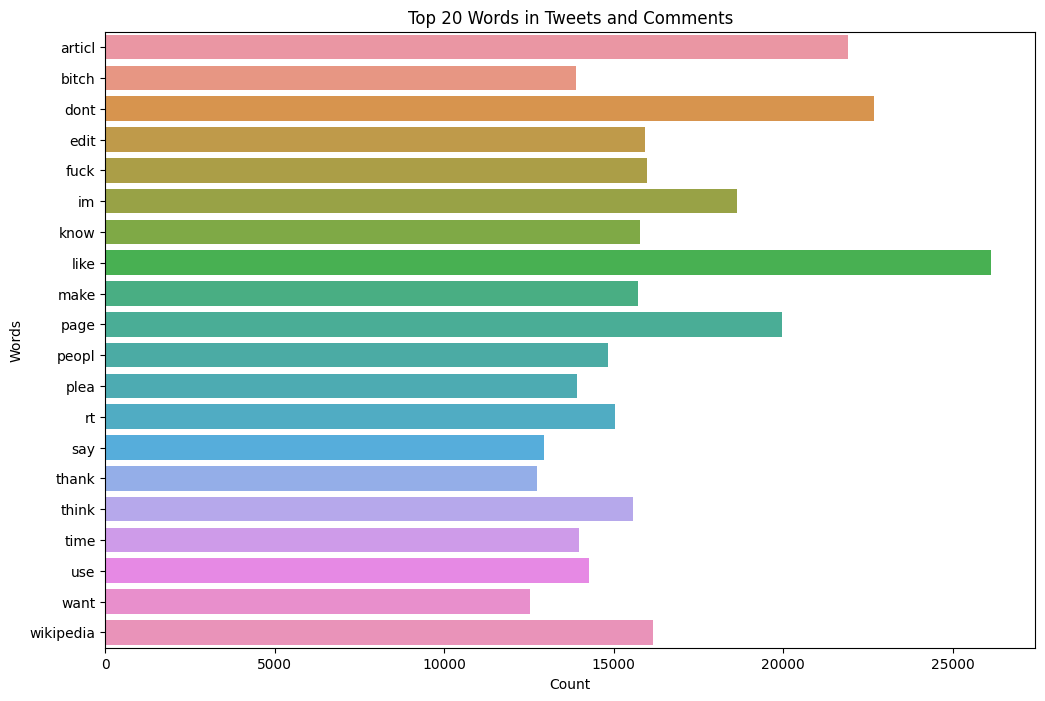

In [84]:
# Tokenize and count words in tweets and comments
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(merged_df['processed_comment'])

# Plot the top N words
plt.figure(figsize=(12, 8))
sns.barplot(x=word_counts.sum(axis=0).tolist()[0], y=vectorizer.get_feature_names_out())
plt.title('Top 20 Words in Tweets and Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

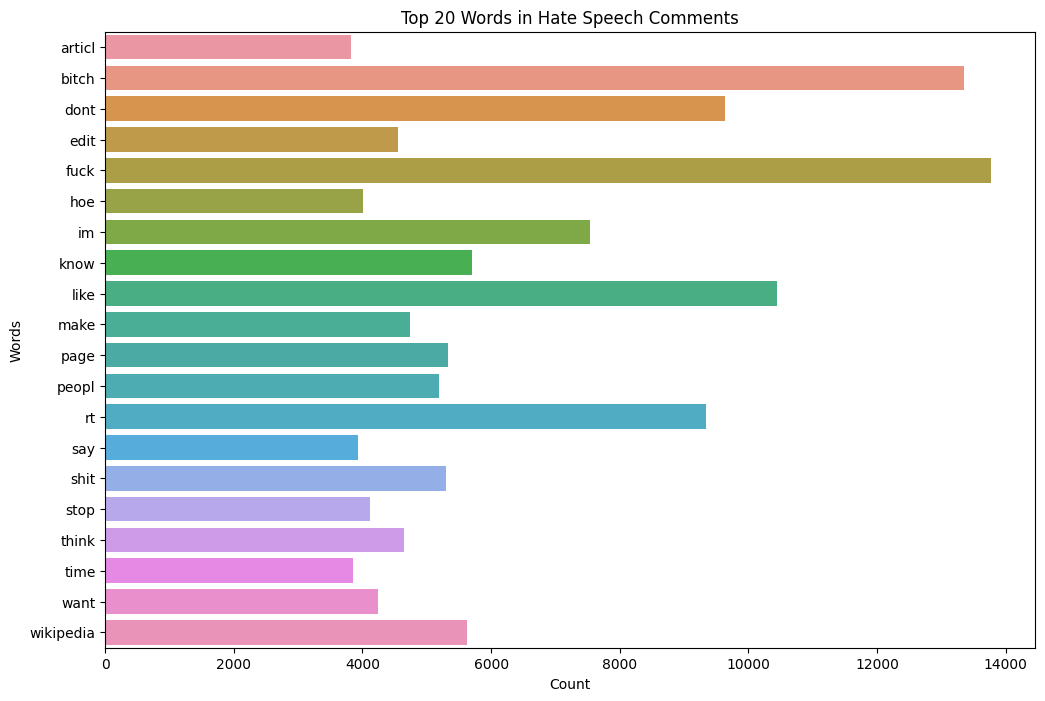

In [85]:
# Tokenize and count words in tweets and comments
vectorizer2 = CountVectorizer(stop_words='english', max_features=20)
hate_word_counts = vectorizer2.fit_transform(merged_df['processed_comment'][merged_df.label == 1])
# Plot the top N words
plt.figure(figsize=(12, 8))
sns.barplot(x=hate_word_counts.sum(axis=0).tolist()[0], y=vectorizer2.get_feature_names_out())
plt.title('Top 20 Words in Hate Speech Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

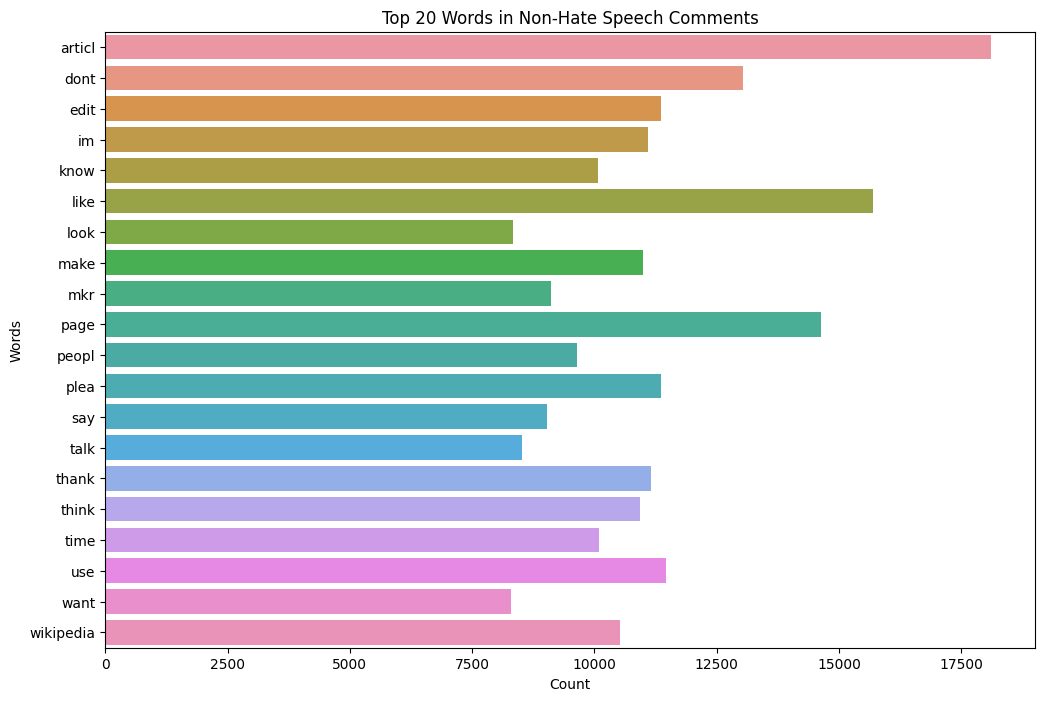

In [86]:
vectorizer3 = CountVectorizer(stop_words='english', max_features=20)
non_hate_word_counts = vectorizer3.fit_transform(merged_df['processed_comment'][merged_df.label == 0])
# Plot the top N words
plt.figure(figsize=(12, 8))
sns.barplot(x=non_hate_word_counts.sum(axis=0).tolist()[0], y=vectorizer3.get_feature_names_out())
plt.title('Top 20 Words in Non-Hate Speech Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

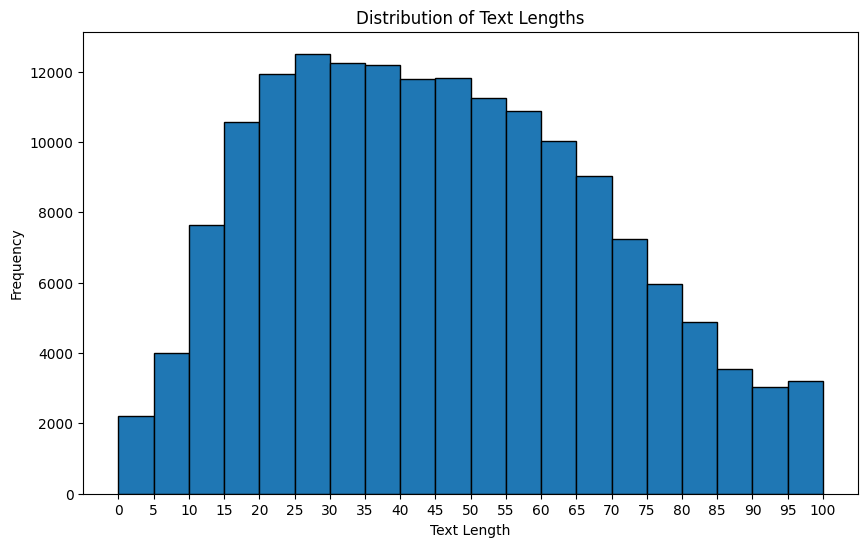

In [87]:
text_lengths = merged_df['processed_comment'].apply(len)

# Define bin edges with intervals of 5, up to a maximum of 100
bin_edges = np.arange(0, 101, 5)

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=bin_edges, edgecolor='black')

# Add labels and title
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Set x-axis ticks at bin edges
plt.xticks(bin_edges)

# Show the plot
plt.show()


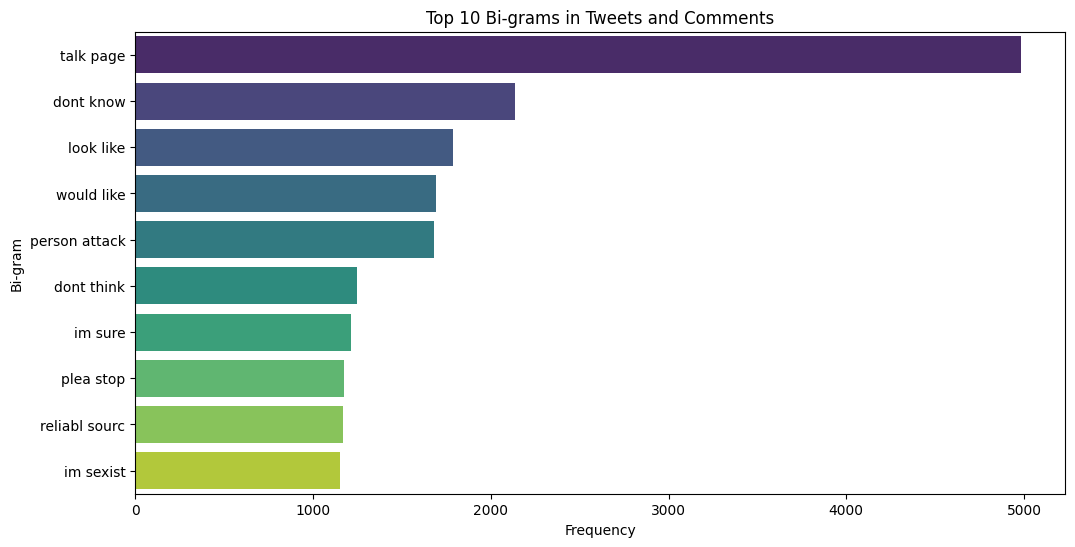

In [88]:
text_data = merged_df['processed_comment']

# Create a CountVectorizer to identify bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bi_grams_matrix = vectorizer.fit_transform(text_data)

# Sum the occurrences of each bi-gram
bi_grams_sum = bi_grams_matrix.sum(axis=0)

# Get the feature names (bi-grams)
bi_gram_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store bi-gram frequencies
bi_gram_df = pd.DataFrame(bi_grams_sum, columns=bi_gram_names).transpose()
bi_gram_df.columns = ['frequency']

# Sort the DataFrame by frequency to get the top 10 bi-grams
top_10_bi_grams = bi_gram_df.sort_values(by='frequency', ascending=False).head(10)

# Plot the top 10 bi-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_bi_grams['frequency'], y=top_10_bi_grams.index, palette='viridis')
plt.title('Top 10 Bi-grams in Tweets and Comments')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.show()


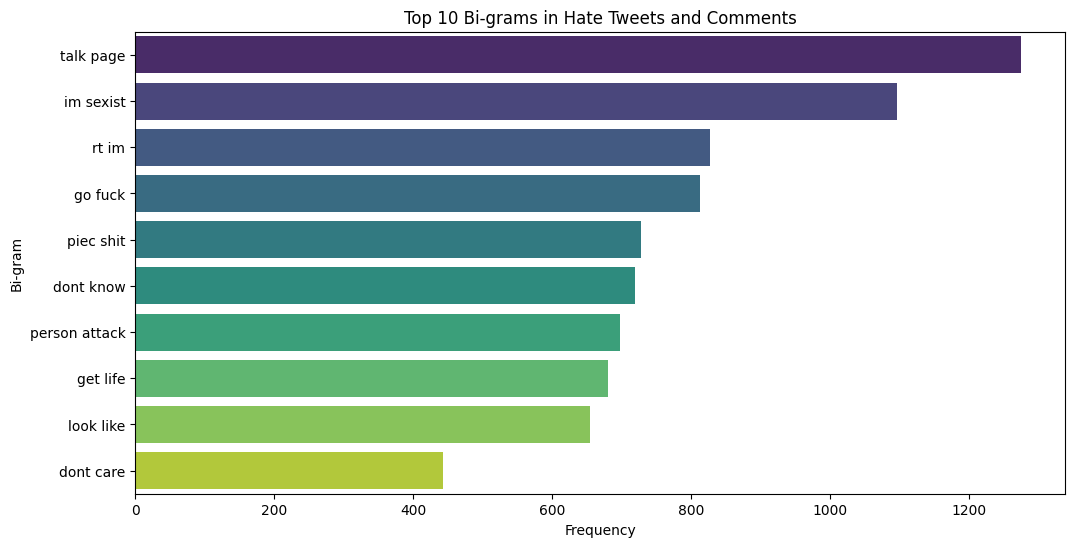

In [89]:
hate_text_data = merged_df['processed_comment'][merged_df.label == 1]

# Create a CountVectorizer to identify bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bi_grams_matrix = vectorizer.fit_transform(hate_text_data)

# Sum the occurrences of each bi-gram
bi_grams_sum = bi_grams_matrix.sum(axis=0)

# Get the feature names (bi-grams)
bi_gram_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store bi-gram frequencies
hate_bi_gram_df = pd.DataFrame(bi_grams_sum, columns=bi_gram_names).transpose()
hate_bi_gram_df.columns = ['frequency']

# Sort the DataFrame by frequency to get the top 10 bi-grams
top_10_bi_grams = hate_bi_gram_df.sort_values(by='frequency', ascending=False).head(10)

# Plot the top 10 bi-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_bi_grams['frequency'], y=top_10_bi_grams.index, palette='viridis')
plt.title('Top 10 Bi-grams in Hate Tweets and Comments')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.show()


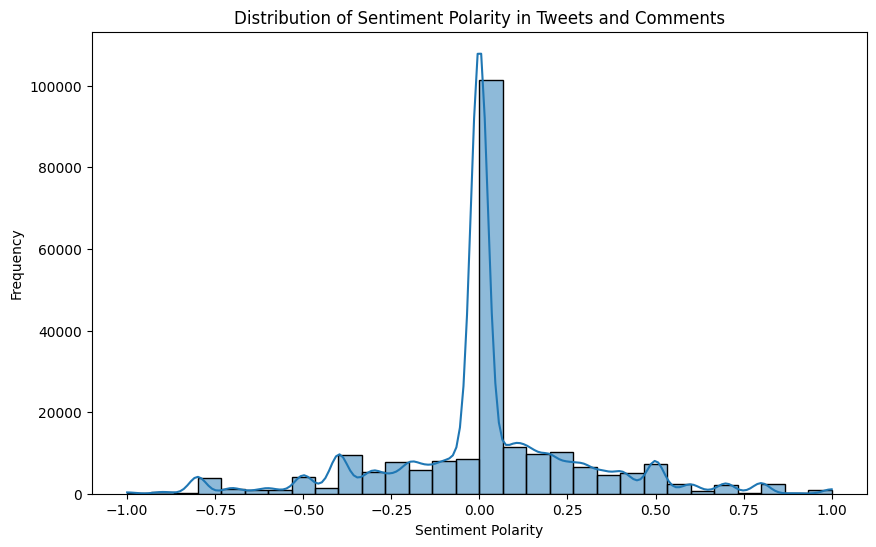

In [90]:
# Function to get sentiment polarity of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to tweets
merged_df['sentiment_polarity'] = merged_df['processed_comment'].apply(get_sentiment)

# Plot the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sentiment_polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity in Tweets and Comments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Model Training and Evaluation:

In [91]:
# Handle missing values in the 'comment' column
merged_df['processed_comment'].fillna('', inplace=True)

# Drop rows with missing labels
merged_df.dropna(subset=['label'], inplace=True)

# TF-IDF Features-F1
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf_merged_df_comment = tfidf_vectorizer.fit_transform(merged_df['processed_comment'])


Logisitic Regression

In [92]:
# Logistic Regression
X = tfidf_merged_df_comment
y = merged_df['label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
#Train Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [94]:
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [95]:
acc_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

In [96]:
print("Logistic Regression Report:")
print(report_logistic)
print("Accuracy of Logistic Regression: ", acc_logistic)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     28604
           1       0.85      0.79      0.82     16106

    accuracy                           0.88     44710
   macro avg       0.87      0.86      0.86     44710
weighted avg       0.87      0.88      0.87     44710

Accuracy of Logistic Regression:  0.8750391411317379


Support Vector Machine (SVM)

In [97]:
# Train Support Vector Machine (SVM) model
svm = LinearSVC(random_state=42)
svm.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [98]:
y_pred_svm = svm.predict(X_test_scaled)

In [99]:
acc_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

In [100]:
print("SVM Report:")
print(report_svm)
print("Accuracy of SVM: ", acc_svm)

SVM Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     28604
           1       0.75      0.72      0.74     16106

    accuracy                           0.81     44710
   macro avg       0.80      0.79      0.80     44710
weighted avg       0.81      0.81      0.81     44710

Accuracy of SVM:  0.8127264594050548


Naive Bayes

In [101]:
# Train Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [102]:
y_pred_nb = naive_bayes_model.predict(X_test)

In [103]:
acc_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

In [104]:
print("Naive Bayes Report:")
print(report_nb)
print("Accuracy of Naive Bayes: ", acc_nb)

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     28604
           1       0.83      0.74      0.78     16106

    accuracy                           0.85     44710
   macro avg       0.85      0.83      0.83     44710
weighted avg       0.85      0.85      0.85     44710

Accuracy of Naive Bayes:  0.851196600313129


# Evaluation of Model:

Text(0.5, 1.0, 'Logistic Regression')

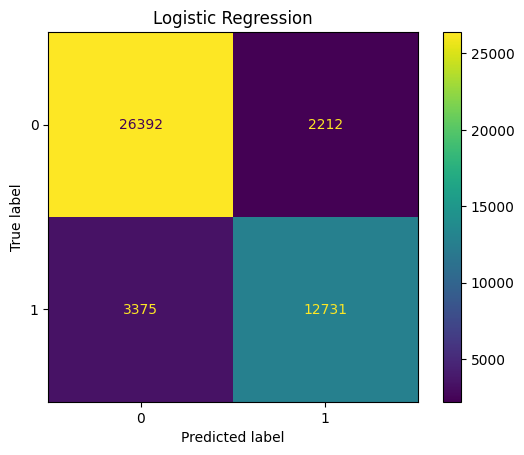

In [105]:
# Plot the confusion matrix
logistic_cm = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(confusion_matrix=logistic_cm, display_labels=logistic_model.classes_).plot();
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Naive Bayes')

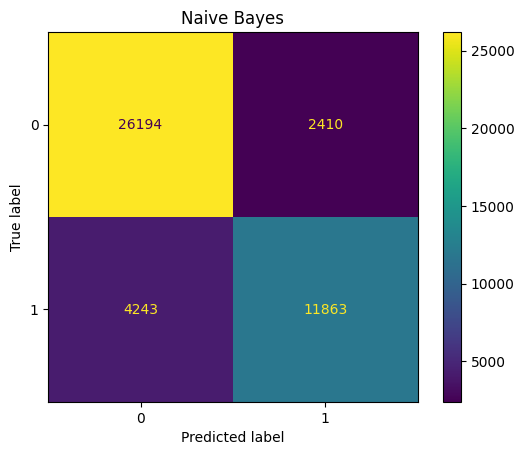

In [106]:
# Plot the confusion matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=naive_bayes_model.classes_).plot();
plt.title('Naive Bayes')

Text(0.5, 1.0, 'SVM Model')

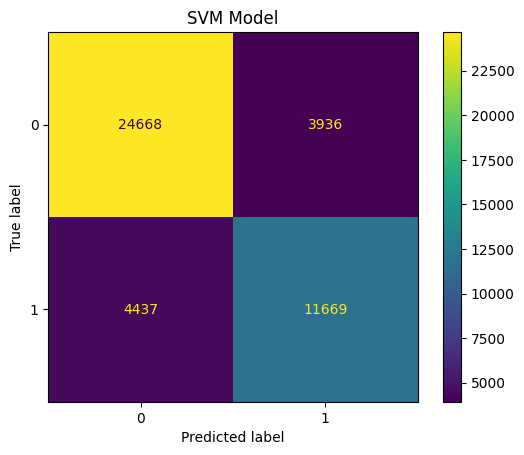

In [107]:
# Plot the confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_).plot();
plt.title('SVM Model')

In [108]:
# Function to plot ROC curve for a binary classification model
def plot_roc_curve(model, X_test, y_test, model_name):
    try:
        y_score = model.decision_function(X_test)
    except AttributeError:
        # For models like MultinomialNB that don't have decision_function
        y_score = model.predict_proba(X_test)[:, 1]  # Use the probability of the positive class
    #y_score = model.decision_function(X_test)

    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 7))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

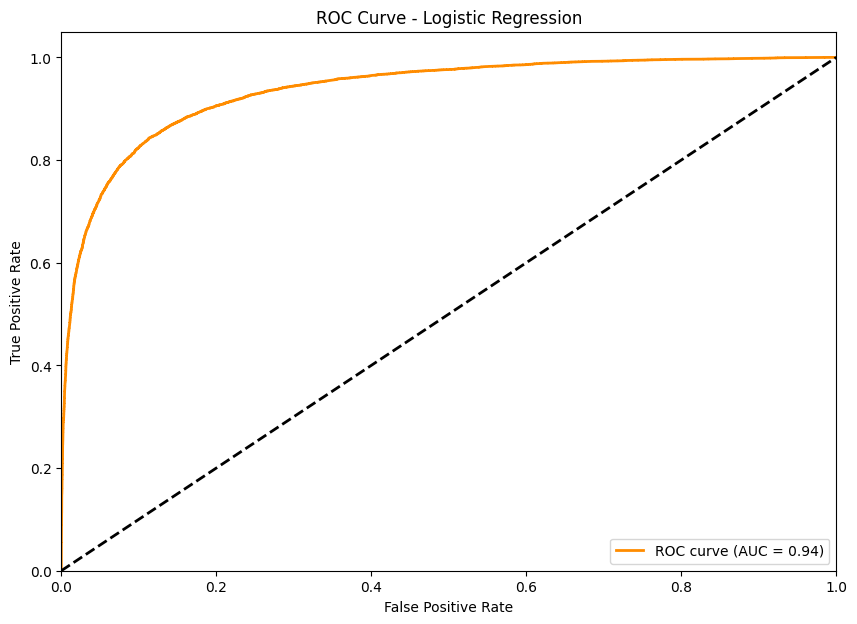

In [109]:
# Plot ROC curve for Logistic Regression
plot_roc_curve(logistic_model, X_test_scaled, y_test, model_name='Logistic Regression')

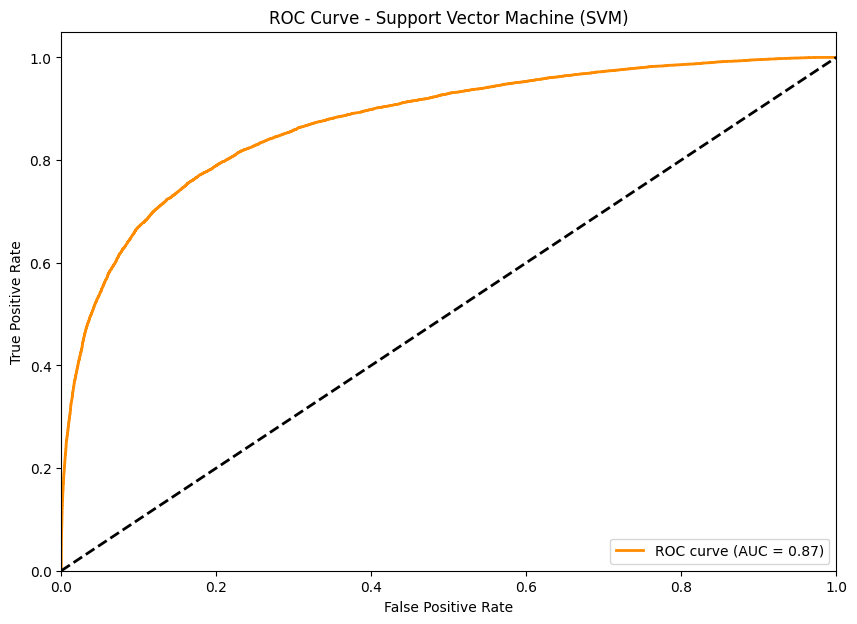

In [110]:
# Plot ROC curve for SVM
plot_roc_curve(svm, X_test_scaled, y_test, model_name='Support Vector Machine (SVM)')

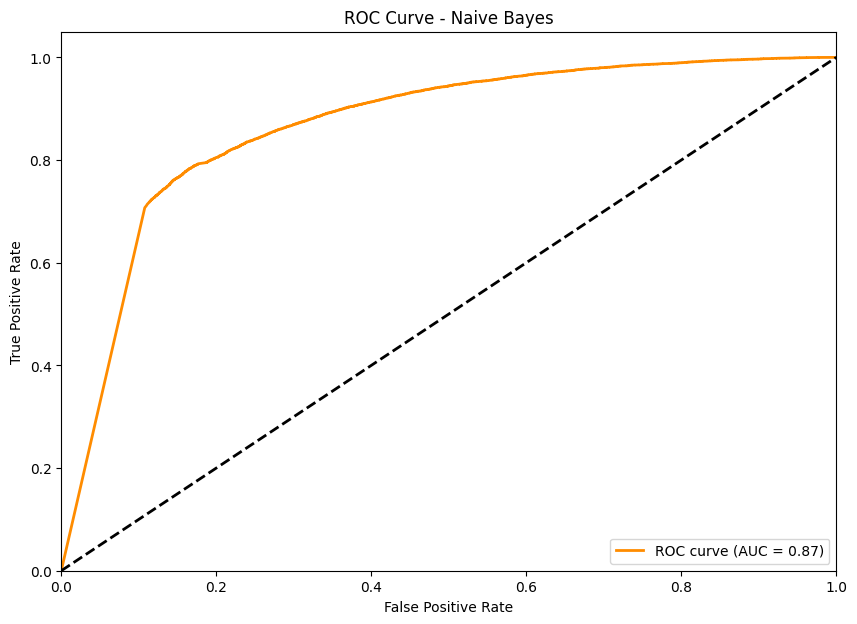

In [111]:
# Plot ROC curve for Naive Bayes
plot_roc_curve(naive_bayes_model, X_test_scaled, y_test, model_name='Naive Bayes')

In [112]:
# Feature Importance (for Logistic Regression and SVM)
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'coef_'):
        importance = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    else:
        print(f"Feature importance not available for {model_name}.")
        return

    feature_importance = pd.DataFrame(importance, index=feature_names, columns=['importance'])
    sorted_feature_importance = feature_importance.sort_values(by='importance', ascending=False)

    # Plot the top N features
    top_n = 20
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_feature_importance['importance'][:top_n], y=sorted_feature_importance.index[:top_n])
    plt.title(f'Top {top_n} Features - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

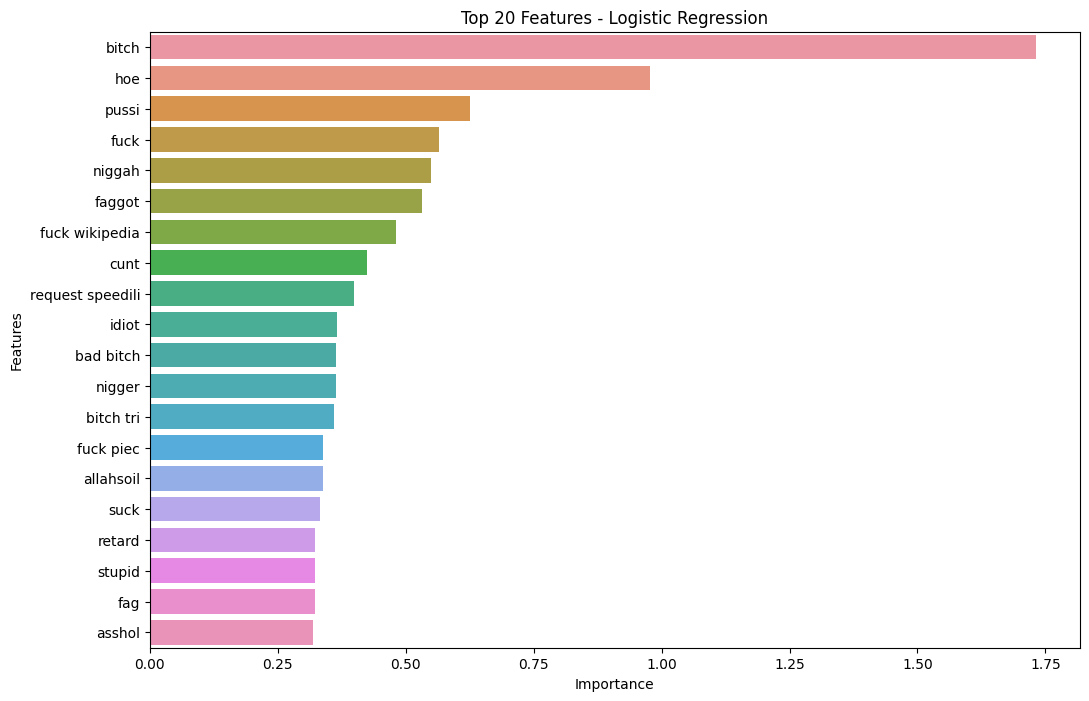

In [113]:
# Plot feature importance for Logistic Regression
plot_feature_importance(logistic_model, tfidf_vectorizer.get_feature_names_out(), 'Logistic Regression')

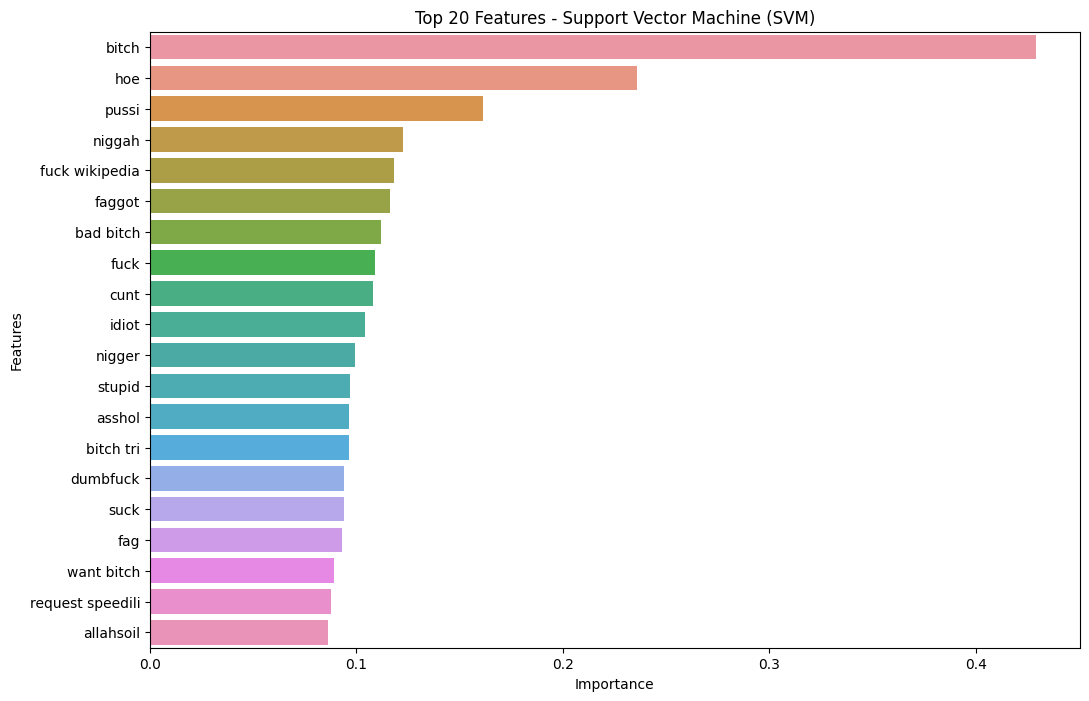

In [114]:
# Plot feature importance for SVM
plot_feature_importance(svm, tfidf_vectorizer.get_feature_names_out(), 'Support Vector Machine (SVM)')

In [115]:
# Plot feature importance for Naive Bayes
plot_feature_importance(naive_bayes_model, tfidf_vectorizer.get_feature_names_out(), 'Naive Bayes')

Feature importance not available for Naive Bayes.


## Feature Engineering:

Sentiment analysis using TextBlob, to extract sentiment polarity scores as features.​

In [116]:
# Sentiment Analysis using TextBlob and adding polarity scores as features
# Function to get sentiment polarity of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to tweets
merged_df['sentiment_polarity'] = merged_df['processed_comment'].apply(get_sentiment)
print(merged_df['sentiment_polarity'])

0        -0.3
1         0.0
2         0.0
3         0.5
4         0.0
         ... 
223550   -0.8
223551    0.0
223552    1.0
223553    0.0
223554    0.3
Name: sentiment_polarity, Length: 223549, dtype: float64


In [117]:
# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined = None

# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(merged_df['processed_comment']), batch_size):
    X_batch_text = merged_df['processed_comment'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = merged_df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Combine TF-IDF features with sentiment polarity scores using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_batch)])

    # Stack batches vertically
    if X_combined is None:
        X_combined = X_batch_combined
    else:
        X_combined = vstack([X_combined, X_batch_combined])

In [118]:
# Split the combined features into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y, random_state=42, test_size=0.2)

In [119]:
# Scale the combined features
scaler_combined = StandardScaler(with_mean=False)
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

Logistic Regression with Combined Features:

In [120]:
#Train Logistic Regression Model
logistic_combined_model = LogisticRegression(max_iter=1000)
logistic_combined_model.fit(X_train_combined_scaled, y_train_combined)

LogisticRegression(max_iter=1000)

In [121]:
y_pred_combined_logistic = logistic_combined_model.predict(X_test_combined_scaled)

In [122]:
acc_combined_logistic = accuracy_score(y_test_combined, y_pred_combined_logistic)
report_combined_logistic = classification_report(y_test_combined, y_pred_combined_logistic)

In [123]:
print("Logistic Regression Report:")
print(report_combined_logistic)
print("Accuracy of Logistic Regression: ", acc_combined_logistic)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     28604
           1       0.85      0.79      0.82     16106

    accuracy                           0.88     44710
   macro avg       0.87      0.86      0.86     44710
weighted avg       0.87      0.88      0.87     44710

Accuracy of Logistic Regression:  0.875083873853724


SVM (Super Vector Machine) Model with Combined Features

In [124]:
# Train Support Vector Machine (SVM) model
svm_combined = LinearSVC(random_state=43)
svm_combined.fit(X_train_combined_scaled, y_train_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=43)

In [125]:
y_pred_svm_combined = svm_combined.predict(X_test_combined_scaled)

In [126]:
acc_svm_combined = accuracy_score(y_test_combined, y_pred_svm_combined)
report_svm_combined = classification_report(y_test_combined, y_pred_svm_combined)

In [127]:
print("SVM Report:")
print(report_svm_combined)
print("Accuracy of SVM: ", acc_svm_combined)

SVM Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     28604
           1       0.75      0.73      0.74     16106

    accuracy                           0.82     44710
   macro avg       0.80      0.80      0.80     44710
weighted avg       0.81      0.82      0.81     44710

Accuracy of SVM:  0.8152985909192574


Naive Bayes Model with Combined Features:

In [128]:
from sklearn.preprocessing import MinMaxScaler

from scipy.sparse import hstack, csr_matrix, vstack

# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined = None

# Again batch processing to combine the features as for Naive Bayes,
# Negative values of sentinment polarity needs to be scaled to non-negative values.
# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(merged_df['processed_comment']), batch_size):
    X_batch_text = merged_df['processed_comment'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = merged_df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Scale and shift sentiment polarity to be non-negative
    sentiment_polarity_scaled = MinMaxScaler().fit_transform(sentiment_polarity_batch)

    # Combine TF-IDF features with sentiment polarity scores using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_scaled)])

    # Stack batches vertically
    if X_combined is None:
        X_combined = X_batch_combined
    else:
        X_combined = vstack([X_combined, X_batch_combined])

# Split the combined features into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y, random_state=42, test_size=0.2)

# Scale the combined features
scaler_combined = StandardScaler(with_mean=False)
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

In [129]:
# Train Naive Bayes Model
naive_bayes_combined_model = MultinomialNB()
naive_bayes_combined_model.fit(X_train_combined_scaled, y_train_combined)

MultinomialNB()

In [130]:
y_pred_nb_combined = naive_bayes_combined_model.predict(X_test_combined)

In [131]:
acc_nb_combined = accuracy_score(y_test_combined, y_pred_nb_combined)
report_nb_combined = classification_report(y_test_combined, y_pred_nb_combined)

In [132]:
print("Naive Bayes Report:")
print(report_nb_combined)
print("Accuracy of Naive Bayes: ", acc_nb_combined)

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     28604
           1       0.77      0.82      0.79     16106

    accuracy                           0.85     44710
   macro avg       0.83      0.84      0.83     44710
weighted avg       0.85      0.85      0.85     44710

Accuracy of Naive Bayes:  0.8452247819279803


Use Doc2Vec to embed the processed tweets into vectors and Combine all the features

In [133]:
# Tokenize the processed tweets
tokenized_comments = merged_df['processed_comment'].apply(lambda x: x.split())

# Create TaggedDocuments for Doc2Vec training
tagged_data = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(tokenized_comments)]

In [134]:
# Initialize and train the Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [135]:
# Function to get Doc2Vec vectors for a given set of words
def get_doc2vec_vector(words):
    return doc2vec_model.infer_vector(words)

In [136]:
# Add Doc2Vec vector columns to the dataset
merged_df['doc2vec'] = tokenized_comments.apply(get_doc2vec_vector)

Combine all the features using batch processing to make it memory efficient

In [137]:
# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined_all = None

# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(merged_df['processed_comment']), batch_size):
    X_batch_text = merged_df['processed_comment'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = merged_df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Doc2Vec vectors for the current batch
    doc2vec_vectors_batch = np.vstack(merged_df['doc2vec'].iloc[i:i + batch_size].to_numpy())

    # Combine TF-IDF features with sentiment polarity scores and Doc2Vec vectors using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_batch), csr_matrix(doc2vec_vectors_batch)])

    # Stack batches vertically
    if X_combined_all is None:
        X_combined_all = X_batch_combined
    else:
        X_combined_all = vstack([X_combined_all, X_batch_combined])

In [138]:
X_combined_all

<223549x10101 sparse matrix of type '<class 'numpy.float64'>'
	with 26334487 stored elements in Compressed Sparse Row format>

In [139]:
# Split the combined features into training and testing sets
X_train_combined_all, X_test_combined_all, y_train_combined_all, y_test_combined_all = train_test_split(
    X_combined_all, y, random_state=42, test_size=0.2)

In [140]:
# Scale the combined features
scaler_combined_all = StandardScaler(with_mean=False)
X_train_combined_all_scaled = scaler_combined_all.fit_transform(X_train_combined_all)
X_test_combined_all_scaled = scaler_combined_all.transform(X_test_combined_all)

Logistic Regression with all the combined features

In [141]:
#Train Logistic Regression Model
logistic_combined_all_model = LogisticRegression(max_iter=1000)
logistic_combined_all_model.fit(X_train_combined_all_scaled, y_train_combined_all)

LogisticRegression(max_iter=1000)

In [142]:
y_pred_combined_all_logistic = logistic_combined_all_model.predict(X_test_combined_all_scaled)

In [143]:
acc_combined_all_logistic = accuracy_score(y_test_combined_all, y_pred_combined_all_logistic)
report_combined_all_logistic = classification_report(y_test_combined_all, y_pred_combined_all_logistic)

In [144]:
print("Logistic Regression Report:")
print(report_combined_all_logistic)
print("Accuracy of Logistic Regression: ", acc_combined_all_logistic)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     28604
           1       0.85      0.79      0.82     16106

    accuracy                           0.88     44710
   macro avg       0.87      0.86      0.86     44710
weighted avg       0.88      0.88      0.88     44710

Accuracy of Logistic Regression:  0.8761574591813912


SVM (Support Vector Machine) Model with all the combined features

In [145]:
# Train Support Vector Machine (SVM) model
svm_combined_all = LinearSVC(random_state=43)
svm_combined_all.fit(X_train_combined_all_scaled, y_train_combined_all)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=43)

In [146]:
y_pred_svm_combined_all = svm_combined_all.predict(X_test_combined_all_scaled)

In [147]:
acc_svm_combined_all = accuracy_score(y_test_combined_all, y_pred_svm_combined_all)
report_svm_combined_all = classification_report(y_test_combined_all, y_pred_svm_combined_all)

In [148]:
print("SVM Report:")
print(report_svm_combined_all)
print("Accuracy of SVM: ", acc_svm_combined_all)

SVM Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     28604
           1       0.74      0.76      0.75     16106

    accuracy                           0.82     44710
   macro avg       0.80      0.80      0.80     44710
weighted avg       0.82      0.82      0.82     44710

Accuracy of SVM:  0.817154998881682


Naive Bayes with all the combined features

In [149]:
# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined_all = None

# Again batch processing to combine the features as for Naive Bayes,
# Negative values of sentinment polarity and doc2vec needs to be scaled to non-negative values.
# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(merged_df['processed_comment']), batch_size):
    X_batch_text = merged_df['processed_comment'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = merged_df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Scale and shift sentiment polarity to be non-negative
    sentiment_polarity_scaled = MinMaxScaler().fit_transform(sentiment_polarity_batch)

    # Doc2Vec vectors for the current batch
    doc2vec_vectors_batch = np.vstack(merged_df['doc2vec'].iloc[i:i + batch_size].to_numpy())

    doc2vec_vectors_scaled = MinMaxScaler().fit_transform(doc2vec_vectors_batch)

    # Combine TF-IDF features with sentiment polarity scores and Doc2Vec vectors using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_scaled), csr_matrix(doc2vec_vectors_scaled)])

    # Stack batches vertically
    if X_combined_all is None:
        X_combined_all = X_batch_combined
    else:
        X_combined_all = vstack([X_combined_all, X_batch_combined])

# Again Split the combined features into training and testing sets
X_train_combined_all, X_test_combined_all, y_train_combined_all, y_test_combined_all = train_test_split(
    X_combined_all, y, random_state=42, test_size=0.2)
# Scale the combined features
scaler_combined_all = StandardScaler(with_mean=False)
X_train_combined_all_scaled = scaler_combined_all.fit_transform(X_train_combined_all)
X_test_combined_all_scaled = scaler_combined_all.transform(X_test_combined_all)

In [150]:
# Train Naive Bayes Model
naive_bayes_combined_all_model = MultinomialNB()
naive_bayes_combined_all_model.fit(X_train_combined_all_scaled, y_train_combined_all)

MultinomialNB()

In [151]:
y_pred_nb_combined_all = naive_bayes_combined_all_model.predict(X_test_combined_all)

In [152]:
acc_nb_combined_all = accuracy_score(y_test_combined_all, y_pred_nb_combined_all)
report_nb_combined_all = classification_report(y_test_combined_all, y_pred_nb_combined_all)

In [153]:
print("Naive Bayes Report:")
print(report_nb_combined_all)
print("Accuracy of Naive Bayes: ", acc_nb_combined_all)

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.99      0.10      0.19     28604
           1       0.38      1.00      0.56     16106

    accuracy                           0.42     44710
   macro avg       0.69      0.55      0.37     44710
weighted avg       0.77      0.42      0.32     44710

Accuracy of Naive Bayes:  0.42482666070230374


Comparision of all of models with different features and interpretation of results:

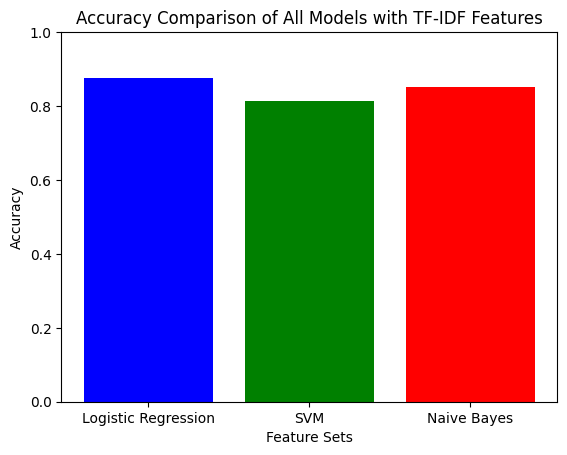

In [154]:
# Plotting for models with TFIDF features
features = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [acc_logistic, acc_svm, acc_nb]

plt.bar(features, accuracies, color=['blue', 'green', 'red'])
plt.ylim([0, 1])
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models with TF-IDF Features')
plt.show()

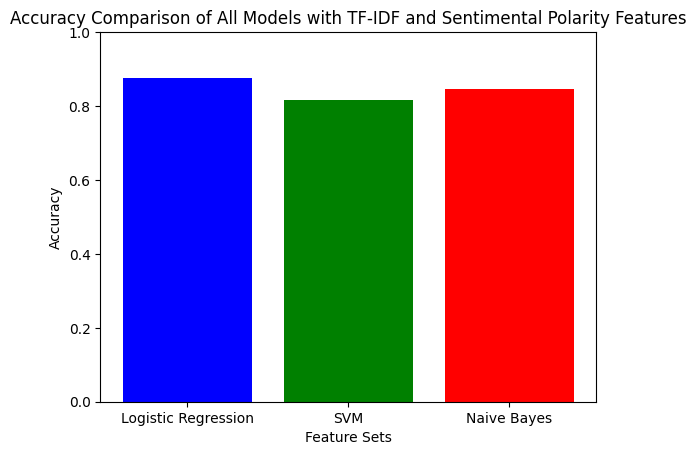

In [155]:
# Plotting for models with TFIDF and Sentimental Polarity features
features = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [acc_combined_logistic, acc_svm_combined, acc_nb_combined]

plt.bar(features, accuracies, color=['blue', 'green', 'red'])
plt.ylim([0, 1])
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models with TF-IDF and Sentimental Polarity Features')
plt.show()

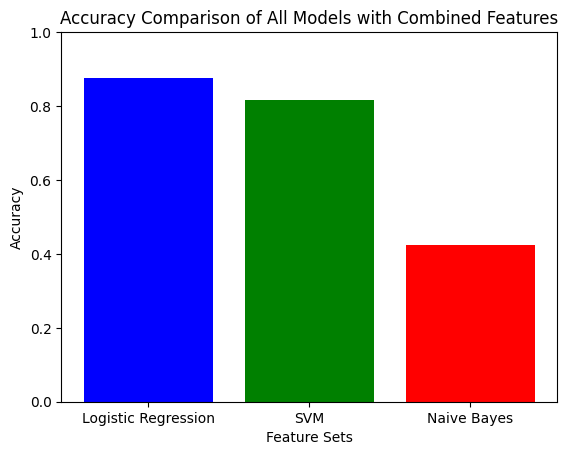

In [156]:
# Plotting for models with combination of all the features.
features = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [acc_combined_all_logistic, acc_svm_combined_all, acc_nb_combined_all]

plt.bar(features, accuracies, color=['blue', 'green', 'red'])
plt.ylim([0, 1])
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models with Combined Features')
plt.show()